In [6]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('C:\\Users\\ddipa\\Downloads\\Housing.csv')


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

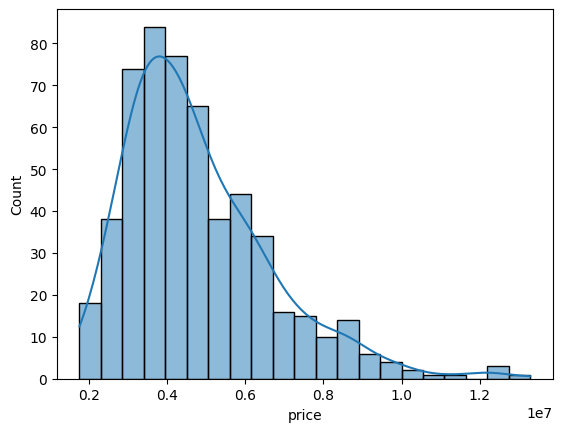

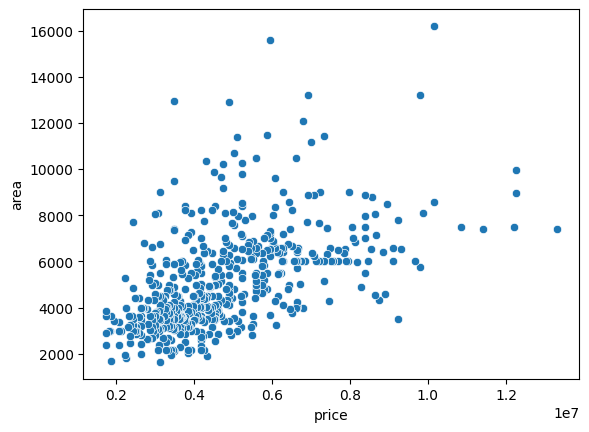

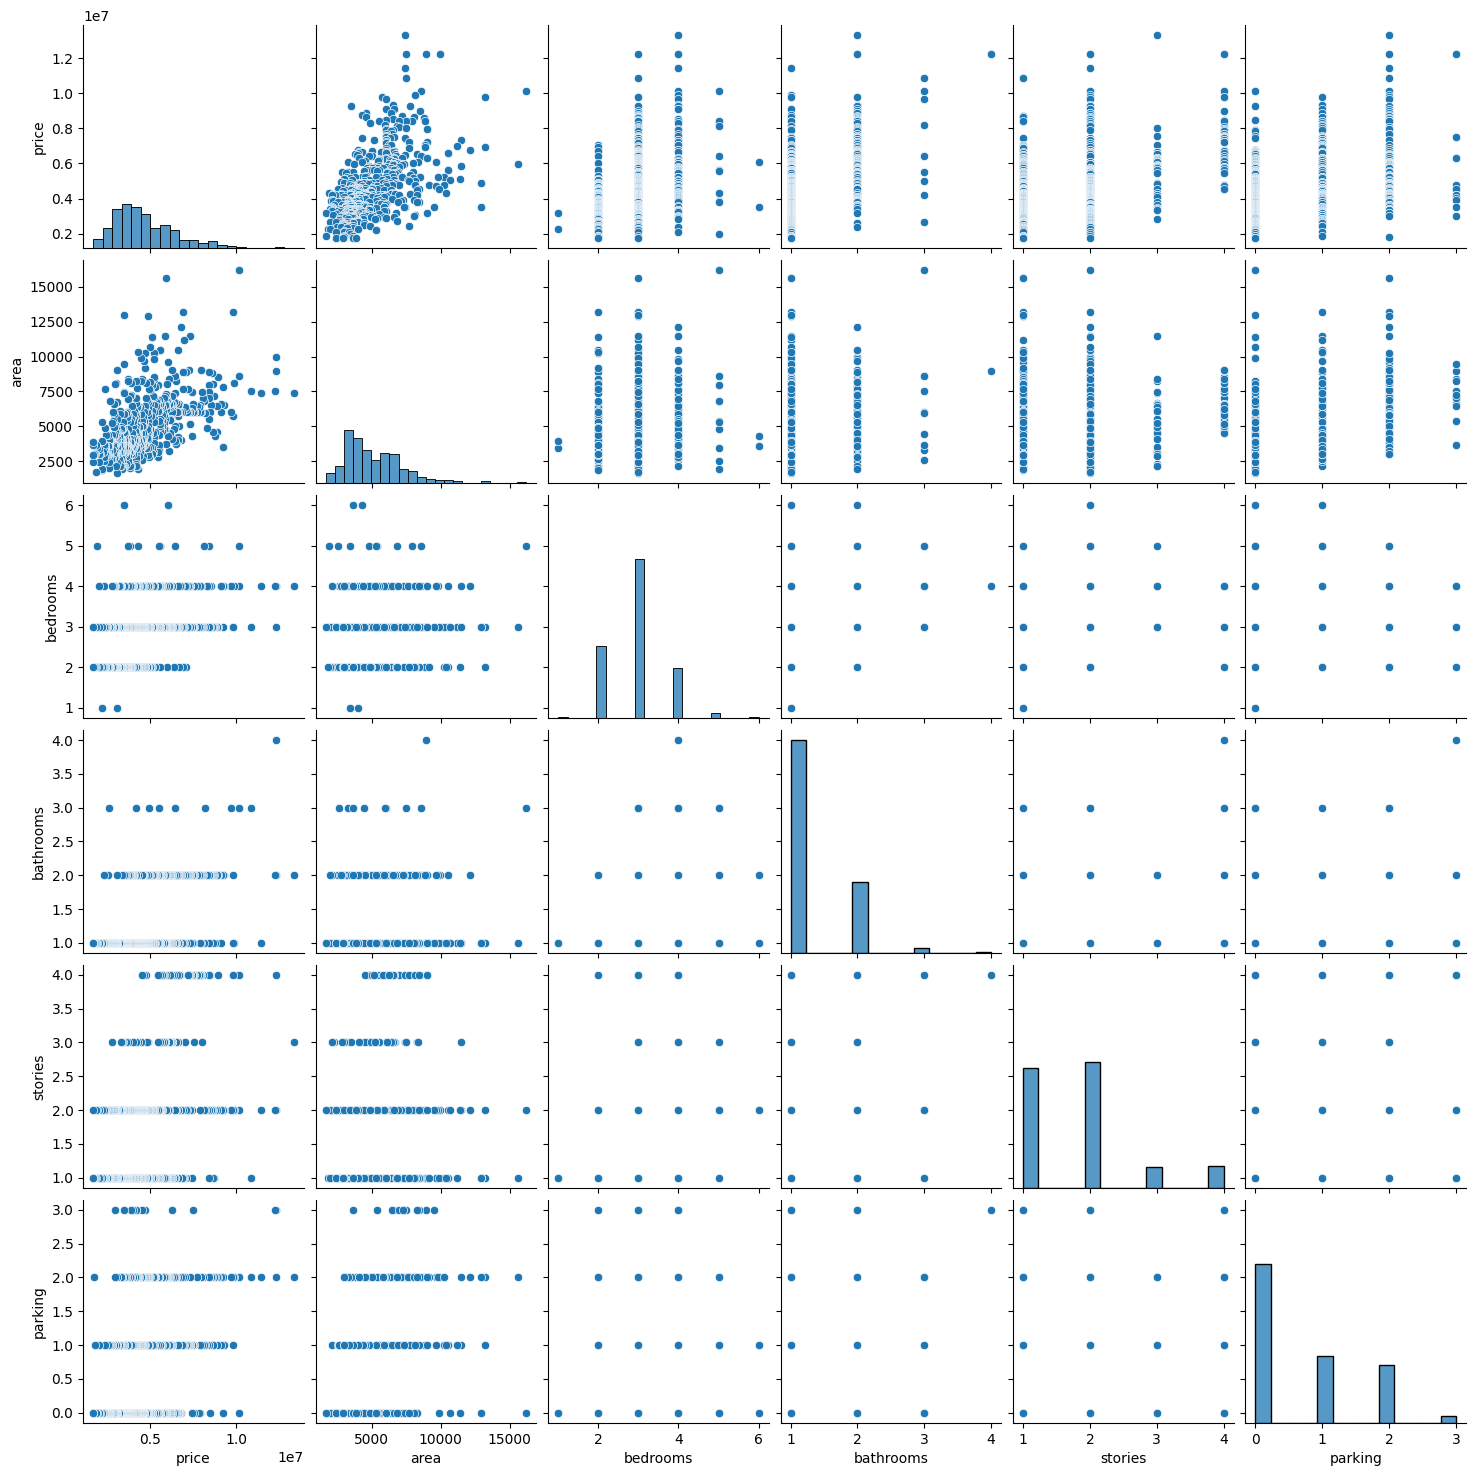

In [8]:
# Univariate analysis
sns.histplot(data['price'], kde=True)
plt.show()

# Bivariate analysis
sns.scatterplot(x='price', y='area', data=data)
plt.show()

# Multivariate analysis
sns.pairplot(data)
plt.show()

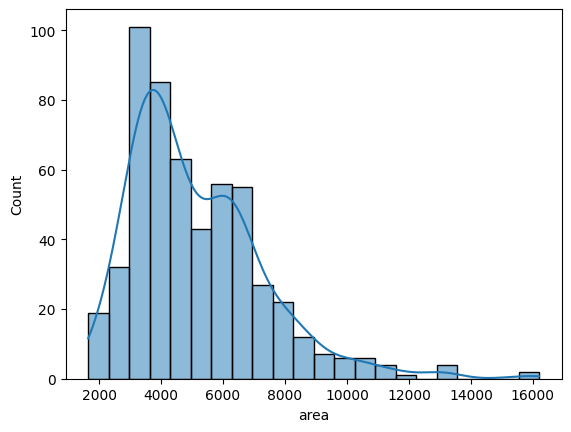

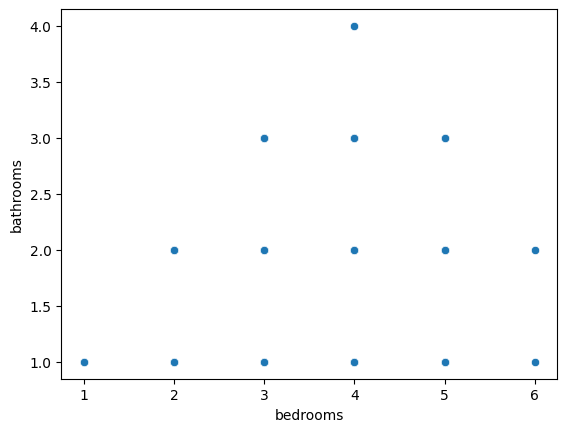

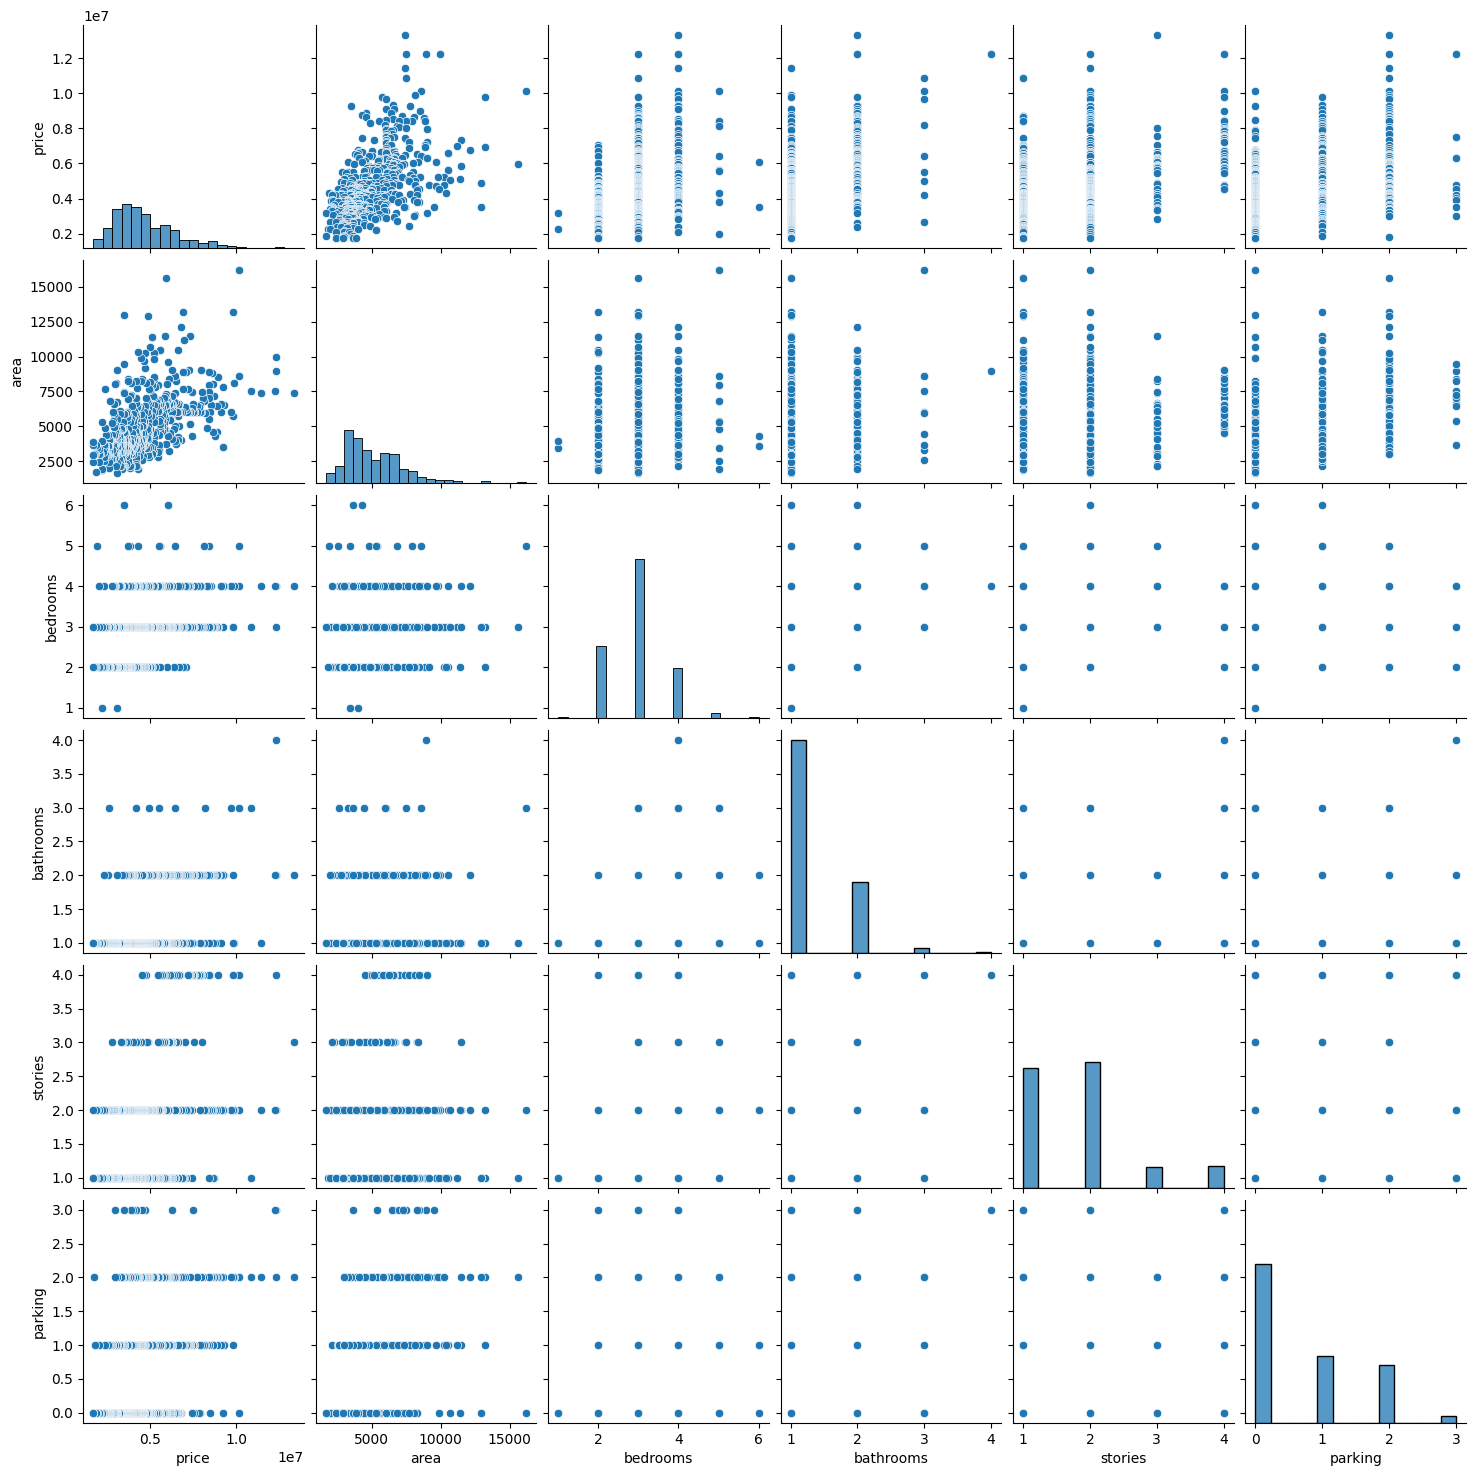

In [16]:
# Univariate analysis
sns.histplot(data['area'], kde=True)
plt.show()

# Bivariate analysis
sns.scatterplot(x='bedrooms', y='bathrooms', data=data)
plt.show()

# Multivariate analysis
sns.pairplot(data)
plt.show()

In [10]:
# Descriptive statistics
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
# Check for missing values
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [12]:
num_rows = len(data)
print("Total number of rows:", num_rows)

Total number of rows: 545


In [13]:
data = data.dropna()

In [14]:
num_rows = len(data)
print("Total number of rows:", num_rows)

Total number of rows: 545


In [15]:
from scipy import stats

# Find outliers using Z-score
z_scores = np.abs(stats.zscore(data['price']))
outliers = np.where(z_scores > 3)

# Replace outliers with a suitable value
replacement_value = data['price'].mean()  # or median()
data['price'].iloc[outliers] = replacement_value


C:\Users\ddipa\AppData\Local\Temp\ipykernel_15128\986714639.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[outliers] = replacement_value


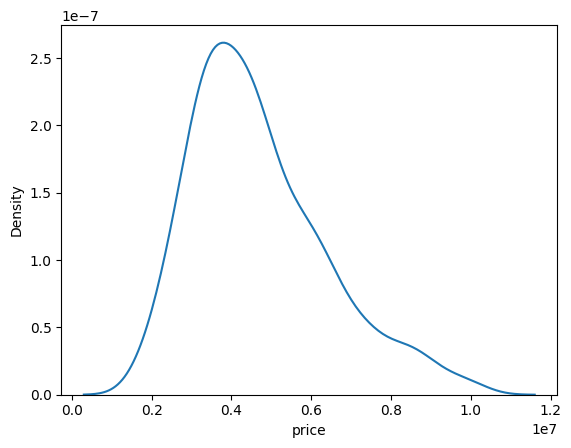

In [16]:
# Univariate analysis
sns.kdeplot(data['price'])
plt.show()

In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:\\Users\\ddipa\\Downloads\\Housing.csv')
# Check for categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns)




In [18]:
# Set pandas display options to show integers (0 and 1)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.0f}'.format)  # Display integers only


In [19]:
print(data.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_no   
0  13300000  7420         4          2        3        2        False  \
1  12250000  8960         4          4        4        3        False   
2  12250000  9960         3          2        2        2        False   
3  12215000  7500         4          2        2        3        False   
4  11410000  7420         4          1        2        2        False   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes   
0          True          True          False         True         False  \
1          True          True          False         True         False   
2          True          True          False        False          True   
3          True          True          False        False          True   
4          True         False           True        False          True   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no   
0                True                False  

In [20]:
import pandas as pd

# Assuming you have the DataFrame named 'data' with True and False values

# Select the columns with True and False values
bool_columns = data.select_dtypes(include=bool).columns

# Convert True and False values to binary matrix
data[bool_columns] = data[bool_columns].astype(int)






In [21]:
# Print the updated DataFrame
print(data)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_no   
0    13300000  7420         4          2        3        2            0  \
1    12250000  8960         4          4        4        3            0   
2    12250000  9960         3          2        2        2            0   
3    12215000  7500         4          2        2        3            0   
4    11410000  7420         4          1        2        2            0   
..        ...   ...       ...        ...      ...      ...          ...   
540   1820000  3000         2          1        1        2            0   
541   1767150  2400         3          1        1        0            1   
542   1750000  3620         2          1        1        0            0   
543   1750000  2910         3          1        1        0            1   
544   1750000  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes   
0               1     

In [22]:
# Assuming 'data' is the DataFrame after one-hot encoding
print(data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


In [23]:
# Split into independent and dependent variables
X = data.drop(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'], axis=1)
y = data['price']


In [24]:
from sklearn.preprocessing import StandardScaler

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model
model = LinearRegression()


In [27]:
#Instance of Linear Regression model

In [28]:
model = LinearRegression()



In [29]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.481383122659876e-18


In [32]:
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1.865846489575141e-09


In [33]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:",r2)

R-squared score: 1.0


In [37]:
import pandas as pd
df = pd.read_csv('C:\\Users\\ddipa\\Downloads\\Housing.csv')
distinct_area = df['area'].unique()

